In [ ]:
import pandas as pd
a=pd.read_csv('/content/insurance.csv')
print(a)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [2]:
import pandas as pd
from scipy.stats import binom
df = pd.read_csv('/content/insurance.csv', dtype={'smoker': str})

df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
p_smoker = df["smoker"].mean()
n1 = 10
prob_smoker_at_least_4 = 1 - binom.cdf(3, n1, p_smoker)
print(f"Probability of selecting at least 4 smokers in a group of 10: {prob_smoker_at_least_4:.4f}")

Probability of selecting at least 4 smokers in a group of 10: 0.1295


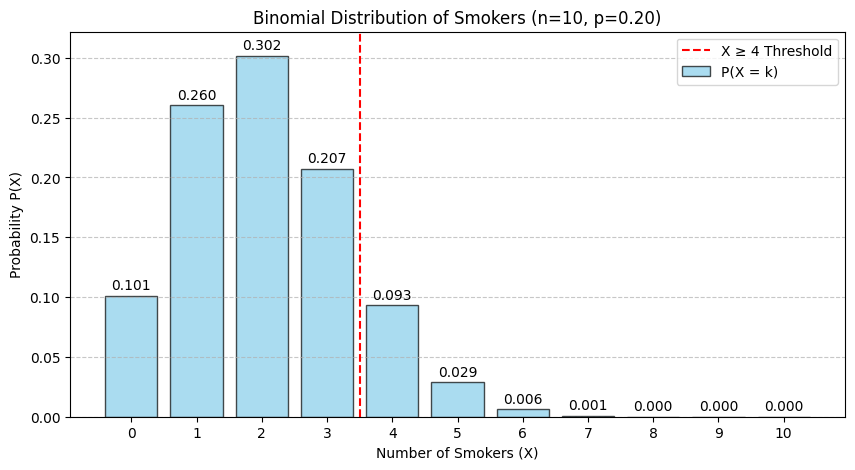

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(0, n1 + 1)
y1 = binom.pmf(x1, n1, p_smoker)

plt.figure(figsize=(10, 5))
plt.bar(x1, y1, color='skyblue', edgecolor='black', alpha=0.7, label="P(X = k)")
plt.axvline(x=3.5, color='red', linestyle='dashed', label="X ≥ 4 Threshold")
plt.xlabel("Number of Smokers (X)")
plt.ylabel("Probability P(X)")
plt.title(f"Binomial Distribution of Smokers (n={n1}, p={p_smoker:.2f})")
plt.xticks(x1)
plt.ylim(0, max(y1) + 0.02)

for i in range(len(x1)):
    plt.text(x1[i], y1[i] + 0.005, f"{y1[i]:.3f}", ha='center', fontsize=10)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Probability of selecting exactly 5 individuals with high medical expenses: 0.1084
Probability of selecting at most 5 individuals with high medical expenses: 0.9336


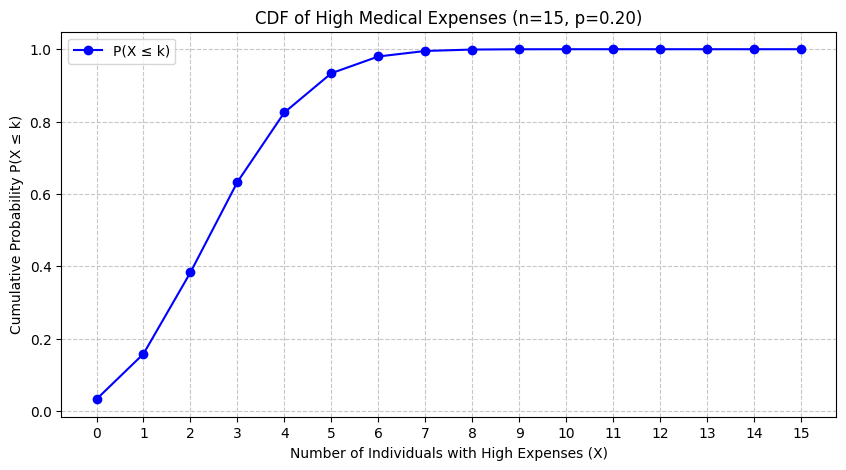

In [4]:
df["high_expense"] = (df["expenses"] > 20000).astype(int)
p_expense = df["high_expense"].mean()
n2 = 15
prob_expense_exactly_5 = binom.pmf(5, n2, p_expense)
print(f"Probability of selecting exactly 5 individuals with high medical expenses: {prob_expense_exactly_5:.4f}")

prob_expense_at_most_5 = binom.cdf(5, n2, p_expense)
print(f"Probability of selecting at most 5 individuals with high medical expenses: {prob_expense_at_most_5:.4f}")

x2 = np.arange(0, n2 + 1)
y2 = binom.cdf(x2, n2, p_expense)

plt.figure(figsize=(10, 5))
plt.plot(x2, y2, marker='o', linestyle='-', color='b', label="P(X ≤ k)")
plt.xlabel("Number of Individuals with High Expenses (X)")
plt.ylabel("Cumulative Probability P(X ≤ k)")
plt.title(f"CDF of High Medical Expenses (n={n2}, p={p_expense:.2f})")
plt.xticks(x2)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

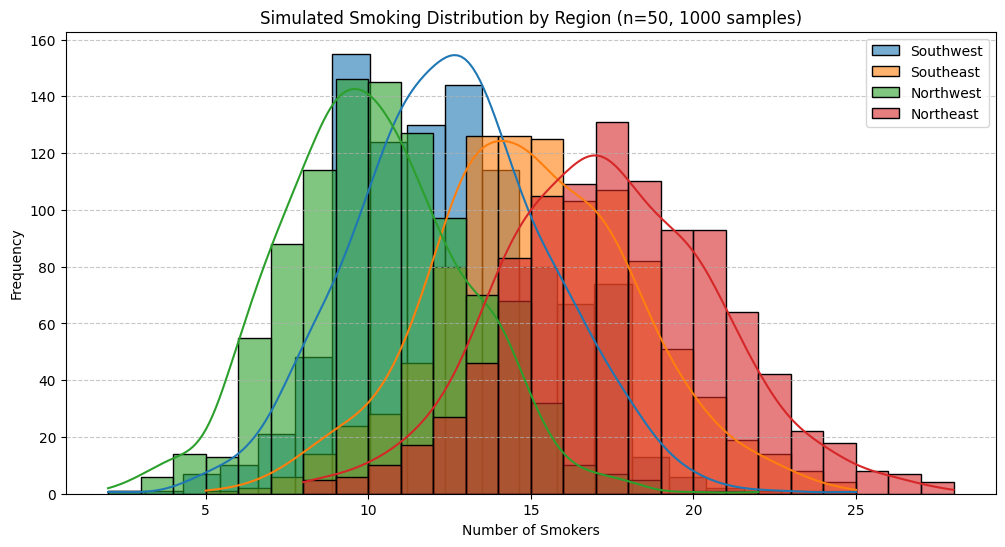


Expected vs Simulated Mean Number of Smokers (n=50):

Southwest: Expected = 12.50, Simulated Mean = 12.55
Southeast: Expected = 15.00, Simulated Mean = 14.99
Northwest: Expected = 10.00, Simulated Mean = 10.08
Northeast: Expected = 17.50, Simulated Mean = 17.32


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

regions = {
    "Southwest": 0.25,
    "Southeast": 0.30,
    "Northwest": 0.20,
    "Northeast": 0.35
}
n = 50
num_simulations = 1000

simulated_data = {region: np.random.binomial(n, p, num_simulations) for region, p in regions.items()}

plt.figure(figsize=(12, 6))
for region, data in simulated_data.items():
    sns.histplot(data, kde=True, bins=20, label=region, alpha=0.6)

plt.xlabel("Number of Smokers")
plt.ylabel("Frequency")
plt.title("Simulated Smoking Distribution by Region (n=50, 1000 samples)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

expected_values = {region: n * p for region, p in regions.items()}
simulated_means = {region: np.mean(data) for region, data in simulated_data.items()}


print("\nExpected vs Simulated Mean Number of Smokers (n=50):\n")
for region in regions.keys():
    print(f"{region}: Expected = {expected_values[region]:.2f}, Simulated Mean = {simulated_means[region]:.2f}")


In [6]:
threshold_charge = np.percentile(df["expenses"], 90)
print(f"insurance charge for high-risk classification: ${threshold_charge:.2f}")

insurance charge for high-risk classification: $34831.72


In [7]:
p_high_risk = 0.10
n_sample = 30
k_high_risk = 8

prob_8_high_risk = binom.pmf(k_high_risk, n_sample, p_high_risk)
print(f"Probability of selecting exactly 8 high-risk individuals in a sample of 30: {prob_8_high_risk:.6f}")

Probability of selecting exactly 8 high-risk individuals in a sample of 30: 0.005764


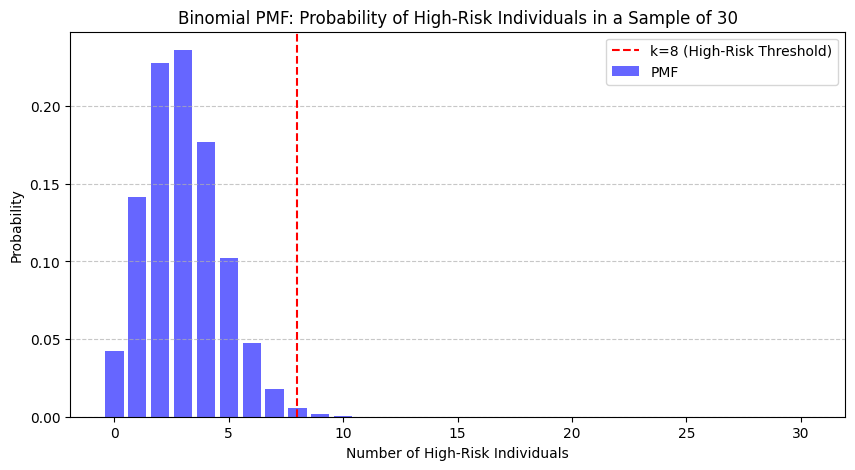

In [8]:
x = np.arange(0, n_sample + 1)
y = binom.pmf(x, n_sample, p_high_risk)

plt.figure(figsize=(10, 5))
plt.bar(x, y, color="blue", alpha=0.6, label="PMF")
plt.axvline(k_high_risk, color="red", linestyle="dashed", label="k=8 (High-Risk Threshold)")
plt.xlabel("Number of High-Risk Individuals")
plt.ylabel("Probability")
plt.title("Binomial PMF: Probability of High-Risk Individuals in a Sample of 30")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

p_more_than_3_children = 0.40
n_individuals = 12
k_at_least_5 = 5

prob_at_least_5 = 1 - binom.cdf(k_at_least_5 - 1, n_individuals, p_more_than_3_children)

manual_prob = 1 - sum(binom.pmf(k, n_individuals, p_more_than_3_children) for k in range(5))

num_simulations = 1000
simulated_data = np.random.binomial(n_individuals, p_more_than_3_children, num_simulations)

simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data)
theoretical_mean = n_individuals * p_more_than_3_children
theoretical_variance = n_individuals * p_more_than_3_children * (1 - p_more_than_3_children)

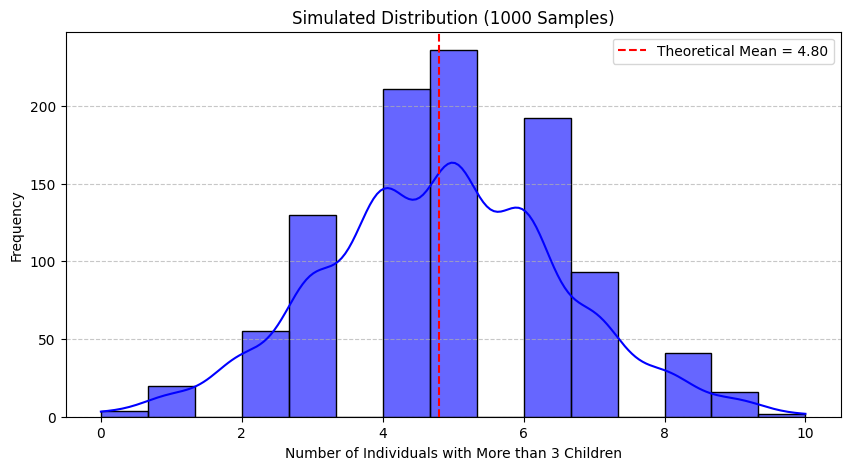

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(simulated_data, kde=True, bins=15, color="blue", alpha=0.6)
plt.axvline(theoretical_mean, color="red", linestyle="dashed", label=f"Theoretical Mean = {theoretical_mean:.2f}")
plt.xlabel("Number of Individuals with More than 3 Children")
plt.ylabel("Frequency")
plt.title("Simulated Distribution (1000 Samples)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [11]:
print(f"Probability (at least 5 individuals have >3 children): {prob_at_least_5:.6f}")
print(f"Manual Calculation Probability: {manual_prob:.6f}")
print(f"Simulated Mean: {simulated_mean:.3f}, Theoretical Mean: {theoretical_mean:.3f}")
print(f"Simulated Variance: {simulated_variance:.3f}, Theoretical Variance: {theoretical_variance:.3f}")


Probability (at least 5 individuals have >3 children): 0.561822
Manual Calculation Probability: 0.561822
Simulated Mean: 4.839, Theoretical Mean: 4.800
Simulated Variance: 2.859, Theoretical Variance: 2.880
